# UTS soal 2

--------------------------------------------------
5 data pertama dari dataset:
   id                                               Text
0   0  Go until jurong point, crazy.. Available only ...
1   1                      Ok lar... Joking wif u oni...
2   2  Free entry in 2 a wkly comp to win FA Cup fina...
3   3  U dun say so early hor... U c already then say...
4   4  Nah I don't think he goes to usf, he lives aro...

Dataset berhasil dimuat.

Melakukan pra-pemrosesan teks...
Contoh teks setelah dibersihkan:
                                                Text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          Clean_Text  
0  jurong point crazy available bugis great world...  
1                                 lar 

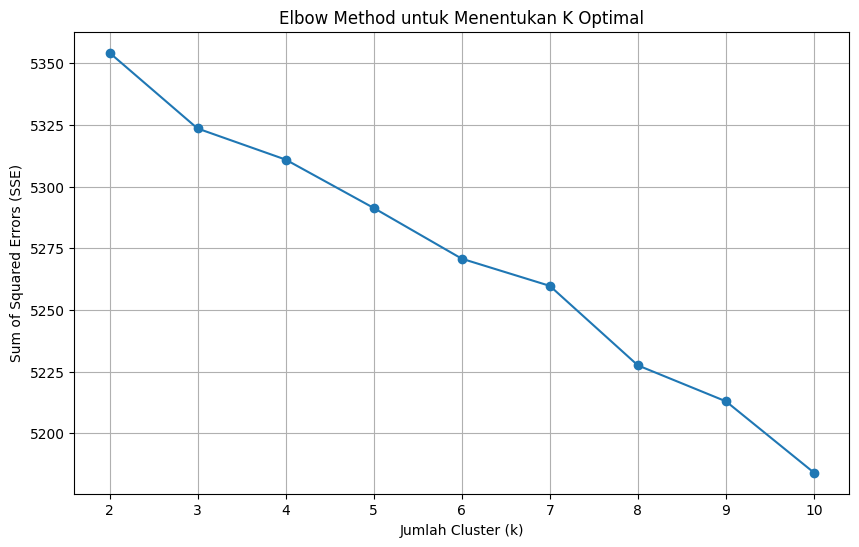


Jumlah cluster optimal yang dipilih adalah: 5
--------------------------------------------------
Melakukan clustering dengan k=5...
Distribusi dokumen per cluster:
Cluster
0    4014
3     615
2     398
4     392
1     153
Name: count, dtype: int64
--------------------------------------------------
Membuat visualisasi cluster...


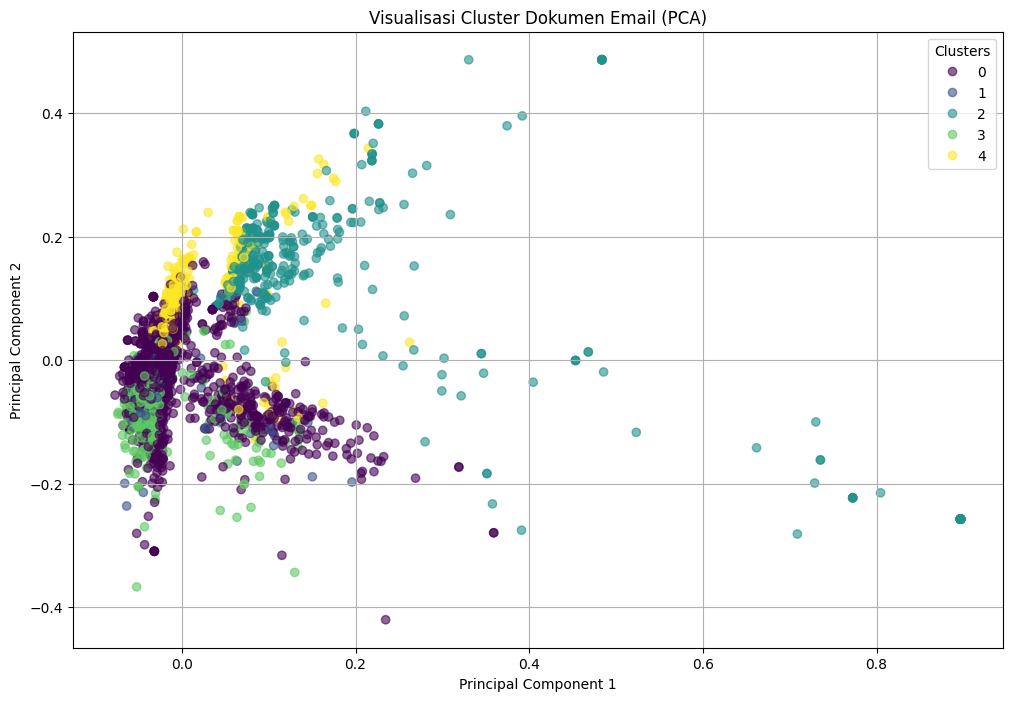


Menampilkan 5 contoh teks dari setiap cluster:

===== CLUSTER 0 =====
- Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
- Ok lar... Joking wif u oni...
- U dun say so early hor... U c already then say...
- FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
- Even my brother is not like to speak with me. They treat me like aids patent.

===== CLUSTER 1 =====
- IÛ÷m going to try for 2 months ha ha only joking
- Yup... Ok i go home look at the timings then i msg Ì_ again... Xuhui going to learn on 2nd may too but her lesson is at 8am
- Fair enough, anything going on?
- Going for dinner.msg you after.
- I am going to sao mu today. Will be done only at 12 

===== CLUSTER 2 =====
- WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hour

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Langkah 1: Download stopwords (hanya perlu sekali) ---
try:
    stopwords.words('indonesian')
except LookupError:
    print("Mengunduh stopwords untuk Bahasa Indonesia...")
    nltk.download('stopwords')
    nltk.download('punkt')
print("-" * 50)

# --- Langkah 2: Pemuatan Data ---
try:
    # Mengasumsikan file bernama 'spam.csv'
    df = pd.read_csv('spam.csv', encoding='latin1')

    # Berdasarkan deskripsi Anda, kolom yang relevan adalah 'Text'
    # Kode di bawah ini mencoba menyesuaikan dengan struktur file yang mungkin
    if 'Text' not in df.columns:
        # Jika strukturnya v1, v2, dll., kita ambil 2 kolom pertama
        df = df.iloc[:, :2]
        df.columns = ['Category', 'Text'] # Ganti nama kolomnya

    # Mengambil kolom 'Text' saja sesuai permintaan
    df = df[['Text']]
    df = df.reset_index().rename(columns={'index': 'id'}) # Membuat kolom 'id'

    print("5 data pertama dari dataset:")
    print(df.head())
    print("\nDataset berhasil dimuat.")

except FileNotFoundError:
    print("Error: File 'spam.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    exit()

# --- Langkah 3: Pra-pemrosesan Teks ---
# Menggunakan stopwords untuk bahasa Inggris karena dataset spam umumnya berbahasa Inggris
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Fungsi untuk membersihkan teks."""
    text = str(text) # Memastikan input adalah string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = text.split()
    cleaned_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(cleaned_tokens)

print("\nMelakukan pra-pemrosesan teks...")
df['Clean_Text'] = df['Text'].apply(preprocess_text)

print("Contoh teks setelah dibersihkan:")
print(df[['Text', 'Clean_Text']].head())
print("-" * 50)

# --- Langkah 4: Ekstraksi Fitur (TF-IDF) ---
print("Mengubah teks menjadi vektor TF-IDF...")
# Mengabaikan kata yang terlalu sering muncul (max_df) atau terlalu jarang (min_df)
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1,2))
X = vectorizer.fit_transform(df['Clean_Text'])
print(f"Bentuk matriks TF-IDF: {X.shape}")
print("-" * 50)

# --- Langkah 5: Menentukan Jumlah Cluster Optimal (Elbow Method) ---
print("Menentukan jumlah cluster optimal dengan Elbow Method...")
sse = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

# Berdasarkan grafik, pilih 'k' di mana penurunan SSE mulai melandai.
# Untuk data spam, 3-5 cluster biasanya cukup baik. Kita pilih 5.
optimal_k = 5
print(f"\nJumlah cluster optimal yang dipilih adalah: {optimal_k}")
print("-" * 50)

# --- Langkah 6: Melakukan Clustering dengan K-Means ---
print(f"Melakukan clustering dengan k={optimal_k}...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("Distribusi dokumen per cluster:")
print(df['Cluster'].value_counts())
print("-" * 50)

# --- Langkah 7: Visualisasi Cluster ---
print("Membuat visualisasi cluster...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Visualisasi Cluster Dokumen Email (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=range(optimal_k), title="Clusters")
plt.grid(True)
plt.show()

# --- Langkah 8: Menampilkan Contoh Teks dari Setiap Cluster ---
print("\nMenampilkan 5 contoh teks dari setiap cluster:")
for i in range(optimal_k):
    print(f"\n===== CLUSTER {i} =====")
    sample_texts = df[df['Cluster'] == i]['Text'].head(5).tolist()
    for text in sample_texts:
        print(f"- {text}")